<a href="https://colab.research.google.com/github/VD151/-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project(Supervised_ML)_by_Vivek_dwivedi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

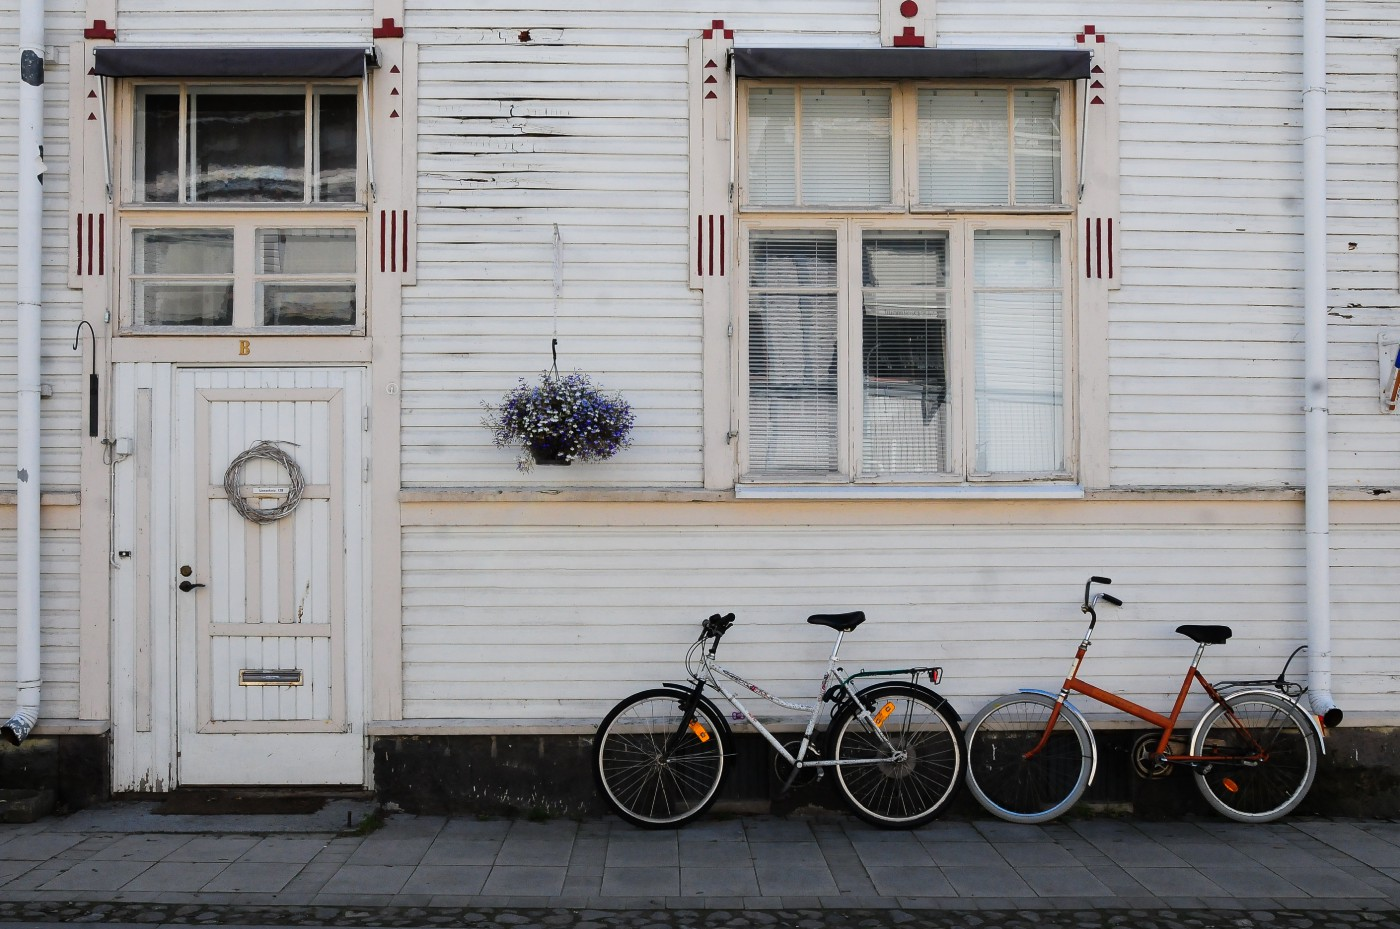

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **LOAD DATASET & IMPORT LIBRARIES**

In [2]:
#Import libraries first (These are the modules from outside the standard library and are required.)
import pandas as pd  #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')



##**MOUNT GOOGLE DRIVE**

In [3]:
#let's mount the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/Project ML/'

# **IMPORT THE DATASET FROM THE DRIVE**

In [5]:
#Let's import the dataset now(this contains the datset that we need to work on)
df = pd.read_csv(path + 'SeoulBikeData.csv', encoding ='latin')
df.info()          #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **A further insight into the data**

## **Summary of the data**

In [6]:
df.head() #to show the first 5 rows for quickly testing if the object has the right type of data in it

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
print(df.shape) #prints the number of rows and columns in the dataset

(8760, 14)


In [8]:
print("Features of the dataset:")
df.columns #prints all the column titles in the dataset 

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
df.nunique() #prints the number of unique values in each column

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [10]:
df.describe()       
#returns description of the data in the DataFrame.
#If the DataFrame contains numerical data, the description contains these information for each column: count- The number of not-empty values.
#mean- The average (mean) value. std- The standard deviation. min- the minimum value.
#25%- The 25% percentile. 50%- The 50% percentile. 75%- The 75% percentile. (for interquartile range). max - the maximum value.

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Conclusion:**

* ***This Dataset contains 8760 lines and 14 columns.*** 
* ***We have 24 hours in a day and 365 days a year, hence 365x24 = 8760, represents the number of lines in the dataset.***

##**Description of the features:**

**The Features:**

**Date** : *The date of the day, from 01/12/2017 to 30/11/2018, format: DD/MM/YYYY, type: str*. 
Hence, we need to convert it into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour (dependent variable in this case), type : int*

**Hour**: *The hour of the day, starting from 0 to 23. It is in a digital time format, type : int*.
we need to convert it into category data type.

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *10-m-visibility means that a person should be able "to see and identify" in the daytime "a prominent dark object against the sky at the horizon" and at night "a known, preferably unfocused, moderately intense light source" that's 10m away, type : int*

**Dew point temperature(°C)**: *Temperature at the beginning of the day, type : Float*

**Solar Radiation (MJ/m2)**: *The Total Daily Solar Radiation displays the integrated solar radiation (MJ/m2)(megajoules per square m) for each Mesonet station for the previous day, type : Float*

**Rainfall(mm)**: *Amount of rain in mm, type : Float*

**Snowfall (cm)**: *Amount of snow in cm, type : Float*

**Seasons**: *Season of the year, type : str.*
 There are 4 seasons namely, summer, winter, autumn and spring in the data. 

**Holiday**: *Whether the day falls in holiday period or not, type: str*

**Functioning Day**: *Whether the day is a Functioning Day or not, type : str*


# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values, hence checking missing values at first is a must!!*** 

##**Is there a null value?**

In [11]:
#let's check the count of null values in each column.
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**NO MISSING VALUES!!!!!** :D

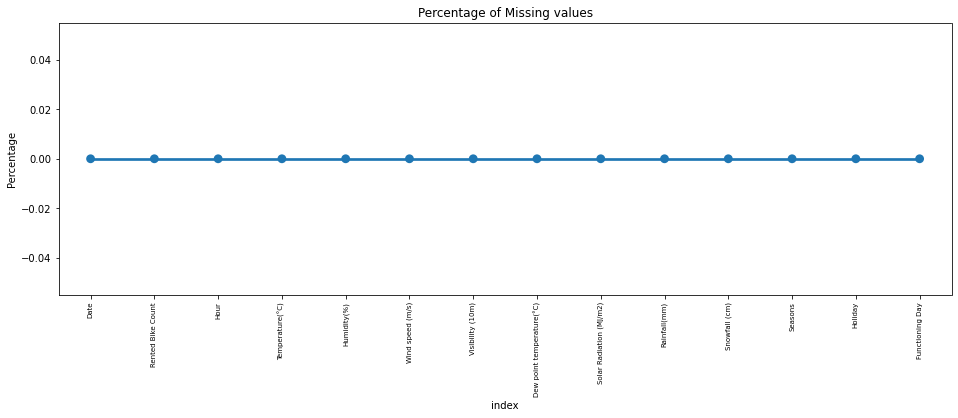

In [12]:
#let's plot and see the null values in terms of percentage
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

* **COMMENT:**
**No missing values(confirmed from the graph as well)*

##**Are there any duplicate values??**

**Why is it important to remove duplicate records from the data?** 
* "Duplication" just means that there is a repetition of data in the dataset. This could be due to things like data entry errors or data collection methods. By removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person. In these case we absolutely should remove duplicate data as it will otherwise give us an inflated sense of model efficacy.

In [13]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* **NO DUPLICATE DATA AS WELL!!  :D :D**

###  **Some of  the column names in the dataset are too large and complex to write every time, so we change them into some simple name, as it won't affect our end results.**

##**Changing column names:**

In [14]:
#Rename the complex column names
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temp',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Function_Day'})

* ***Python reads "Date" column as an object type i.e as a string. Since the date column is very important to analyze the user behaviour, we need to convert it into datetime format and then we need to split it into 3 columns namely: 'year', 'month' & 'day' as a categorical data type.***





# **Breaking the date column**

In [15]:
# Changing the "Date" column into 3 parts: "year","month","day" column
df['Date'] = df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [16]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [17]:
#creating a new column of "week_end_days" and drop the column "Date","day","year"
df['week_end_days']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day','year'],axis=1)

* ***The "date" column is splitted into 3 different columns namely, "year","month","day".***
* ***The "year" column in our dataset has the details from December 2017 to  November 2018. It is practically a year time, hence we don't need the "year" column so we drop it***.
* ***The next column "day" contains the details of each day of the month, for our relevance we don't need each day of every month data but we need to know whether a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [18]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Function_Day,month,week_end_days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility         8760 non-null   int64  
 6   Dew_point_temp     8760 non-null   float64
 7   Solar_Radiation    8760 non-null   float64
 8   Rainfall           8760 non-null   float64
 9   Snowfall           8760 non-null   float64
 10  Seasons            8760 non-null   object 
 11  Holiday            8760 non-null   object 
 12  Function_Day       8760 non-null   object 
 13  month              8760 non-null   int64  
 14  week_end_days      8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [20]:
df['week_end_days'].value_counts()

0    6264
1    2496
Name: week_end_days, dtype: int64

##**Changing data type**

*  *As "Hour", "month", "week_end_days" columns are shown as integer data types but they are of categorical data type, we need to change the datatype of these.*

In [21]:
#Change the int64 column into catagory column
cols=['Hour','month','week_end_days']
for col in cols:
  df[col]=df[col].astype('category')

In [22]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Dew_point_temp     8760 non-null   float64 
 7   Solar_Radiation    8760 non-null   float64 
 8   Rainfall           8760 non-null   float64 
 9   Snowfall           8760 non-null   float64 
 10  Seasons            8760 non-null   object  
 11  Holiday            8760 non-null   object  
 12  Function_Day       8760 non-null   object  
 13  month              8760 non-null   category
 14  week_end_days      8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory 


# **Exploratory Data Analysis Of the Dataset**

**Why do we perform EDA?**
* ***Exploratory data analysis (EDA) is performed to analyze and investigate datasets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers required, making it easier to discover patterns, spot anomalies, test a hypothesis, or check assumptions.***

* ***EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. .***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 

## **Analysis of Dependent Variable:**

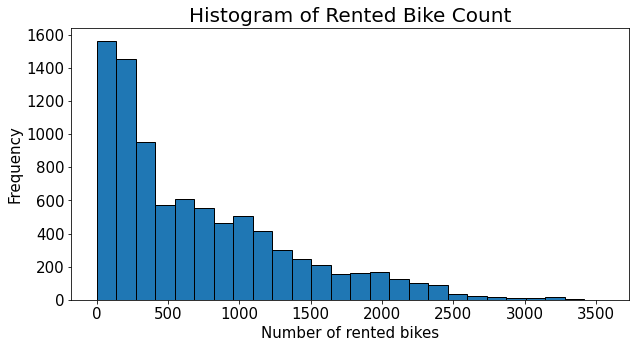

In [23]:
# plot histogram for rented bike count
RBC= df['Rented_Bike_Count']

fig = plt.figure(figsize=(10,5))
plt.rc('font',size=15)

plt.hist(RBC, bins=26, edgecolor='black')

plt.title('Histogram of Rented Bike Count', fontsize= 20 )
plt.rc('font',size=15) 
plt.xlabel('Number of rented bikes', fontsize= 15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

* ***As it can be seen in the histogram, there is a long tail in the data distribution.***

##**Analysis of the dataset based on categorical variables**

* ***Our dependent variable in this dataset is "Rented Bike Count"(the value of which, changes with change in other columns) so we need to analyse this column with respect to other columns by using some visualisation plot. First we will analyze the category data type then we proceed to the numerical data type.***

### **Month-wise analysis**

[Text(0.5, 1.0, 'Count of Rented bikes Month-wise ')]

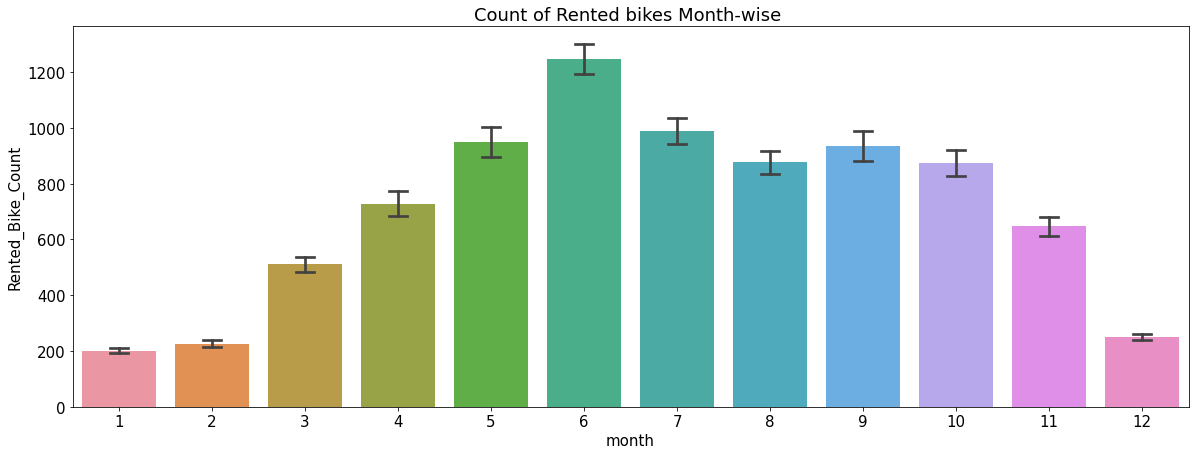

In [24]:
#analysis of data by visualisation using bar plot
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes Month-wise ')

**COMMENT:**
* *From the above bar plot we can clearly say that* ***the demand of the rented bikes is comparatively high for the months 5-10(May-October) than other months.***
* *Also, we can see that* ***these months are a part of summer season.***

### **week_end_days Analysis**

[Text(0.5, 1.0, 'Count of rented bikes during weekdays and weekend ')]

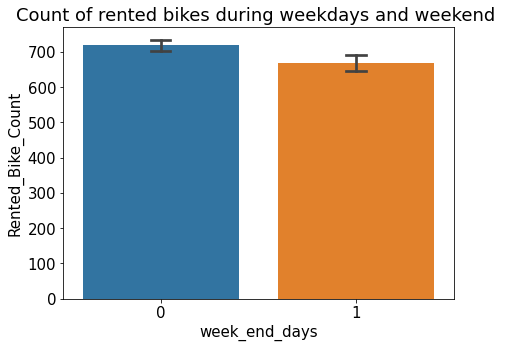

In [25]:
#analysis of data by visualization using bar plot
fig,ax=plt.subplots(figsize=(7,5))
sns.barplot(data=df,x='week_end_days',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Count of rented bikes during weekdays and weekend ')

* **COMMENT:**
* *From the above point plot and bar plot we can say that the **demand for the bike is higher in the week days(in blue color)** (might be due to work/office).*
* *The orange color represents demand for bikes during the weekends, and it clearly depicts that the demand is less on Saturdays & Sundays(weekends).*

###**Hour-wise Analysis(specific time of the day)**

[Text(0.5, 1.0, 'Count of Rented bikes as a function of time(Hour-wise) ')]

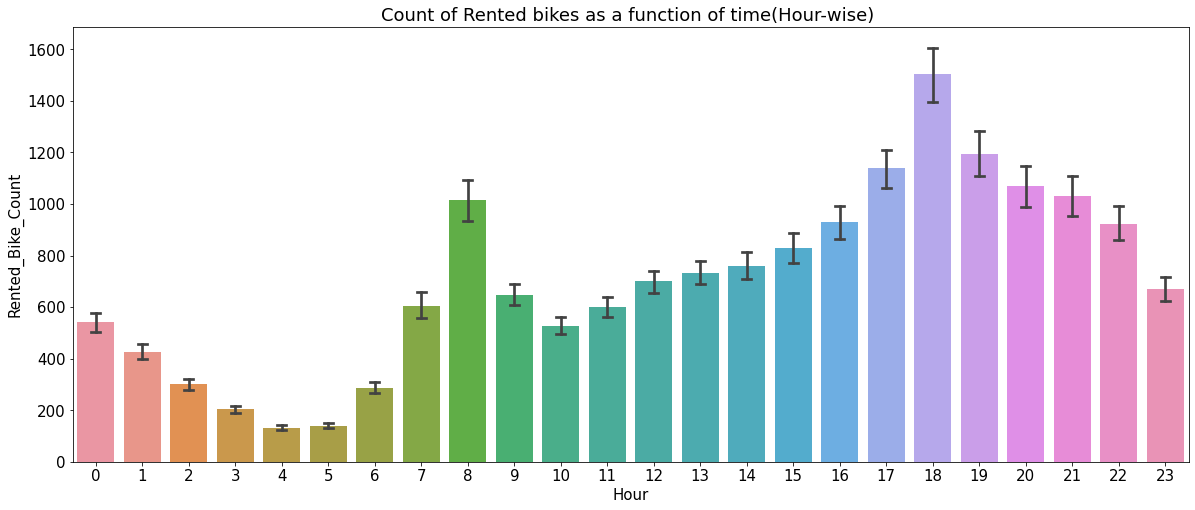

In [26]:
#anlysis of data by visualisation of graph
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes as a function of time(Hour-wise) ')

**COMMENT:**
* *The above plot shows ***the count of rented bikes as a function of time*** (hour of the day) over the entire year.*

* *It can be clearly seen that generally* ***people use rented bikes during working hours, i.e from 7am to 9am(peak at 8am) and 5pm to 7pm(peak at 6pm)***.
*It can be well-interpreted from the rise in demand at 8am(start of work) and 6pm(end of work).*  
* *The **demand for the bikes is at its peak at 6pm**(at the leaving time from work).* 
* *The demand is **more at the night time**, which is easy to comprehend from the graph.*

### **Analysis on the basis of Functioning Day**

[Text(0.5, 1.0, 'Count of Rented bikes vs Functioning Day ')]

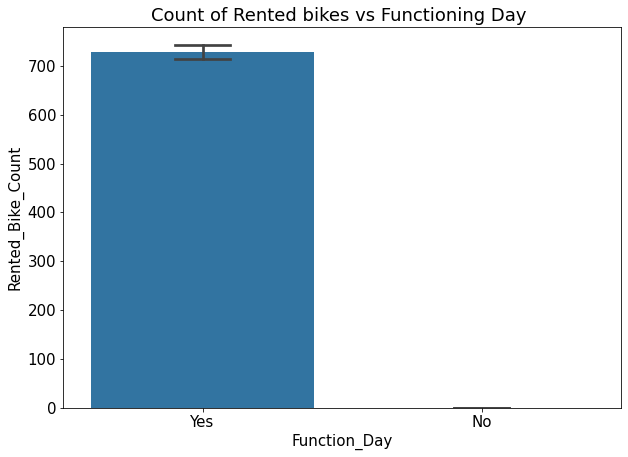

In [27]:
#analysis of data by visualizing bar plot
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Function_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes vs Functioning Day ')

**COMMENT:**
* *The above bar plot clearly depicts that ***people do not rent bikes on non-functional days***.*

###**Analysis on Seasons**

[Text(0.5, 1.0, 'Count of rented bikes in different seasons ')]

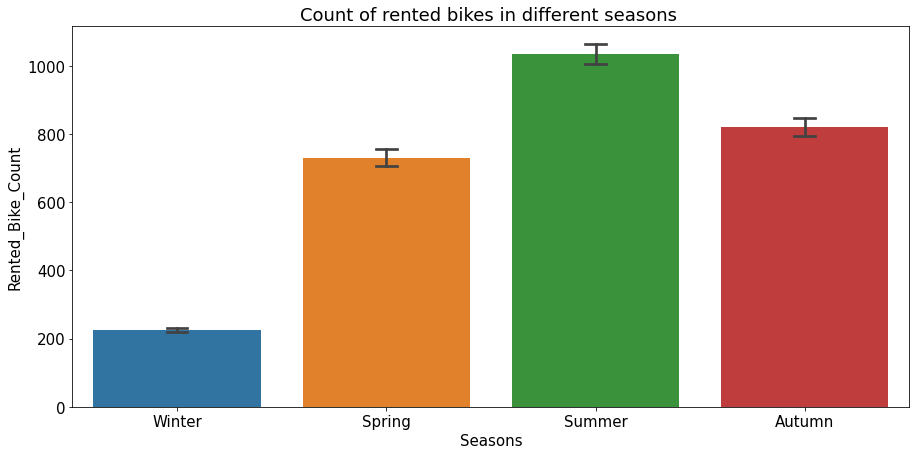

In [28]:
#analysis of data by visualising the bar plot
fig,ax=plt.subplots(figsize=(15,7))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Count of rented bikes in different seasons ')

**COMMENT:**
* *In the above bar plot represents the use of rented bikes in four different seasons, and it clearly shows that:* ***the use of rented bikes is the highest during summers.***

* *The use of rented bike is **very low in winters** probably because of snowfall.*

###**Analysis based on Holiday**

[Text(0.5, 1.0, 'Count of rented bikes during Holiday ')]

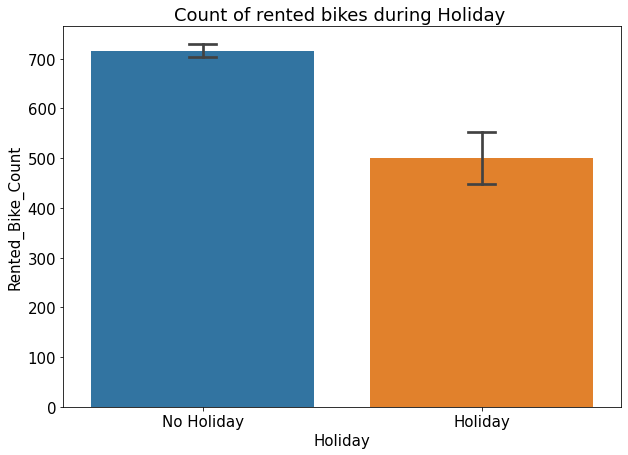

In [29]:
#analysis of data by visualization from bar graph
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.1)
ax.set(title='Count of rented bikes during Holiday ')

**COMMENT:**
* *The above bar plot and point plot represent the use of rented bikes during a holiday, and it clearly depicts that* ***rented bikes are preferred more when there is no holiday(working day).***

##**Analyzing the Numerical variables**

###**Numerical Variables vs. Rented_Bike_Count**

####**1. On the basis of Solar Radiation**

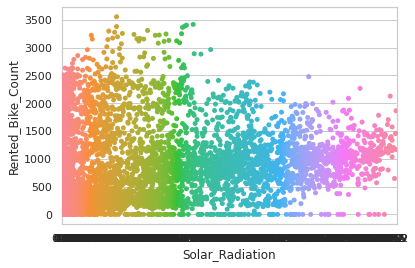

In [30]:
#plot the graph to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
sns.set(style='whitegrid')
sns.swarmplot(x="Solar_Radiation", y="Rented_Bike_Count", data=df)

**COMMENT:**
* *From the above plot we see that,* ***the number of rented bikes is huge, when there is solar radiation, the count of rented bikes has a mean around 1000***

####**2. On the basis of Temperature**

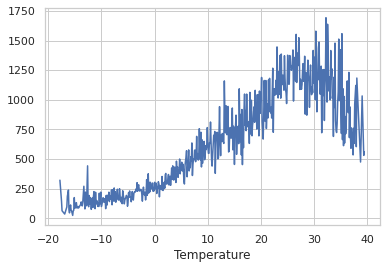

In [31]:
#plot the graph to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()


**COMMENT:**

* *From the above plot it is clear that* ***people rent bikes when it is pretty hot around (30°C on average).***


####**3. On the basis of Dew Point Temperature**

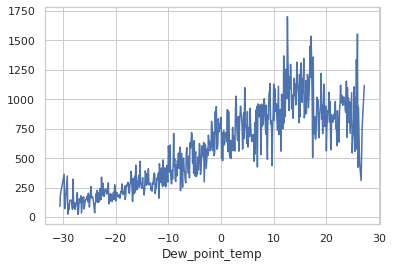

In [32]:
#plot the graph to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temp" 
df.groupby('Dew_point_temp').mean()['Rented_Bike_Count'].plot()

**COMMENT:**
* ***Both Temperature and Dew_point_temperature show a similar trend.***

####**4. On the basis of Snowfall**

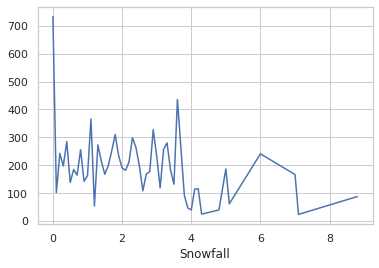

In [33]:
#plot the graph to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()


**COMMENT:**
* *We can see from the plot that,* ***the number of rented bike is very low When there is more than 4 cm of snow and the demand of rented bikes is the highest when there is no snow***

####**5. On the basis of Rainfall**

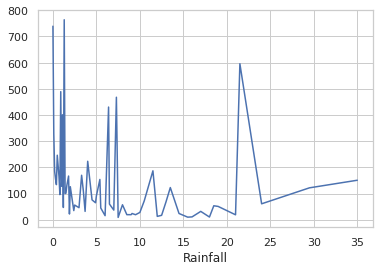

In [34]:
#plot the graph to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


**COMMENT:**
* *We can see from the above plot that* ***there is a fluctuation in the demand of rented bikes as far as rainfall is concerned, here e.g even if there is 22 mm of rain there is a big peak of rented bikes.***
* *We can also see that the* ***demand for rented bikes is the highest when there is no/slight rain.***

####**6. On the basis of Wind Speed**

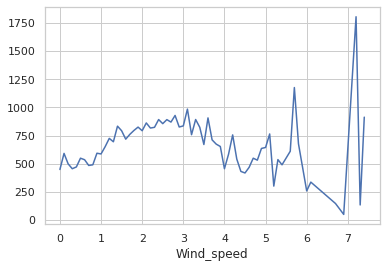

In [35]:
#plot the graph to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

**COMMENT:**
* *We can see from the above plot that the* ***demand of rented bike is nearly uniformly distributed despite wind speed.***
* *Also*  ***when the speed of wind is 7 m/s-8m/s the demand of bike also increases(at its peak)*** *which clearly means people like renting bikes when it is a little windy.*

##**Checking of Correlation between variables**

###**Heatmap**

* **We check correlation between variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.**

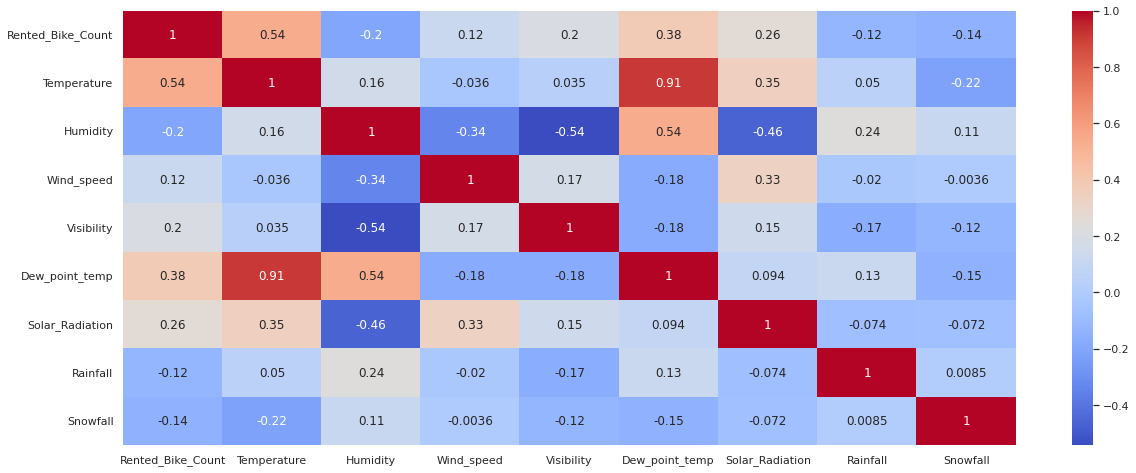

In [36]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
sns.heatmap((correlation), annot=True,cmap='coolwarm')

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the rented bikes are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall





* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column, it won't affect the outcome of our analysis. Also, they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [37]:
#drop the Dew point temperature column
df=df.drop(['Dew_point_temp'],axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Function_Day       8760 non-null   object  
 12  month              8760 non-null   category
 13  week_end_days      8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


##**REGRESSION PLOT**

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps visualize their linear relationships.***

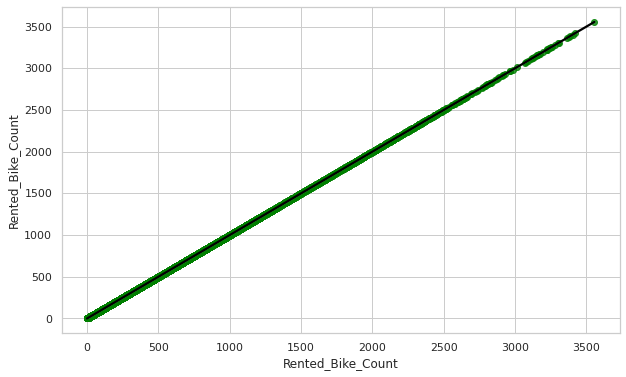

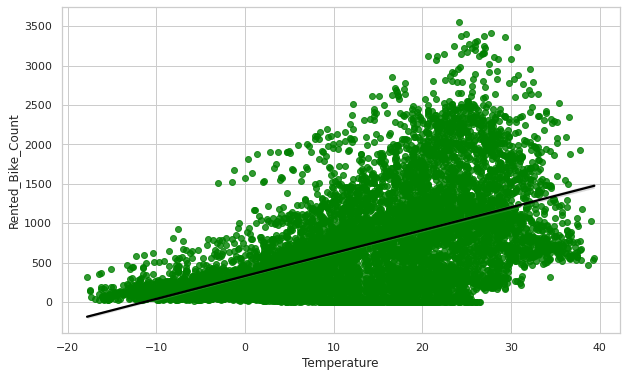

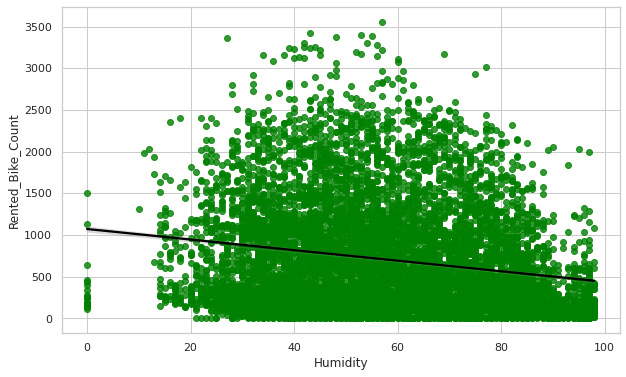

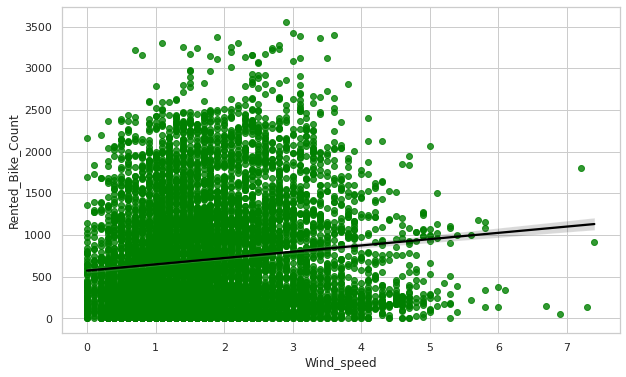

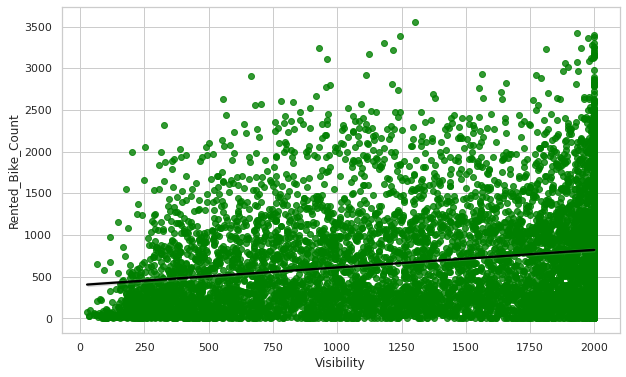

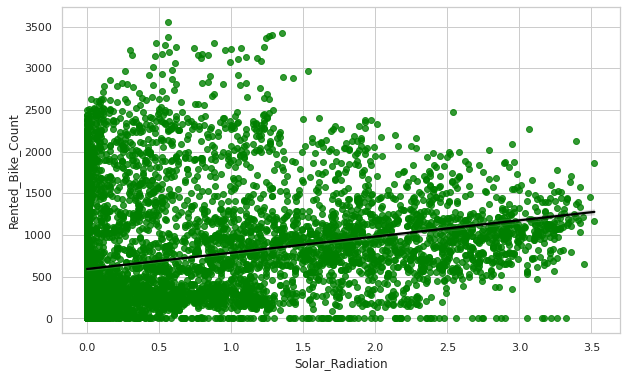

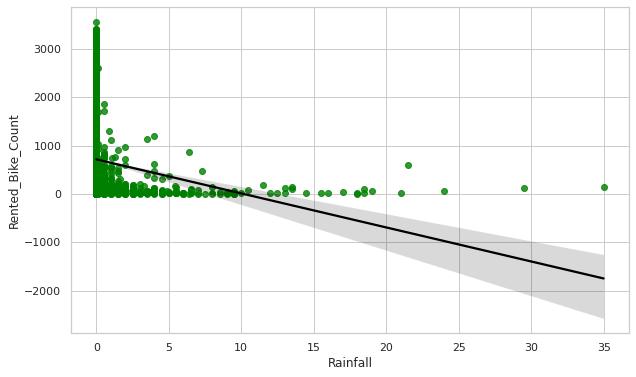

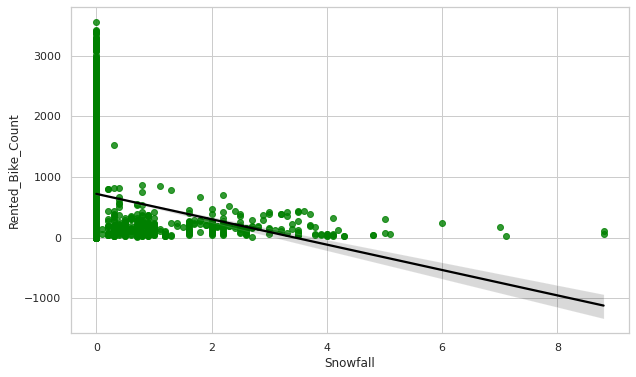

In [39]:
#printing the regression plot for all the numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'green'}, line_kws={"color": "black"})

**COMMENT:**
* *From the above regression plot of all numerical features we see that the columns*  ***'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temp', and 'Solar_Radiation' are positively related to the target variable,***  *which means that the rented bike count increases with increase of these features.*


* ***'Rainfall', 'Snowfall', and 'Humidity' are negatively related with the target variable*** *which means that the rented bike count decreases when these features increase.*

In [40]:
df.describe()


,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000


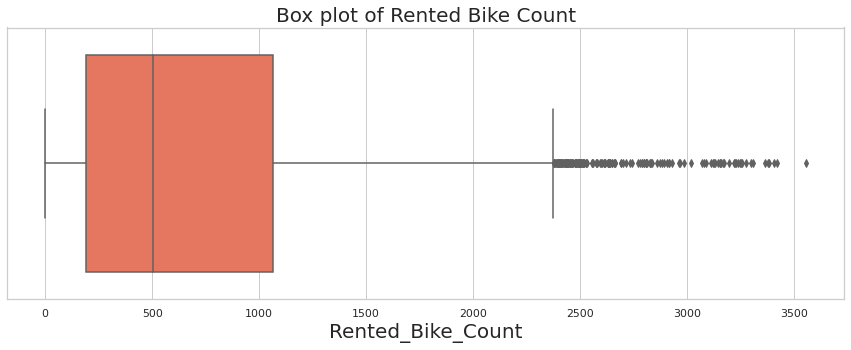

In [41]:
# plot boxplot for rented bike count to check outliers
fig = plt.figure(figsize=(15,5))
sns.boxplot( x=RBC, palette="Reds")

plt.title('Box plot of Rented Bike Count', fontsize=20)
plt.xlabel('Rented_Bike_Count', fontsize=20)

plt.show()

**COMMENT:**
* *In the box plot, the* ***median*** *is represented inside the Red rectangle by a thick grey line and* ***has a value of 504.5,*** *as we can verify from the table above which describes the data.* 
* *The value of the* ***first quartile is 191*** *and* ***the value of the third quartile is 1065.25***
* ***There are many outliers*** *displayed above the upper whisker that are marked with circles.*

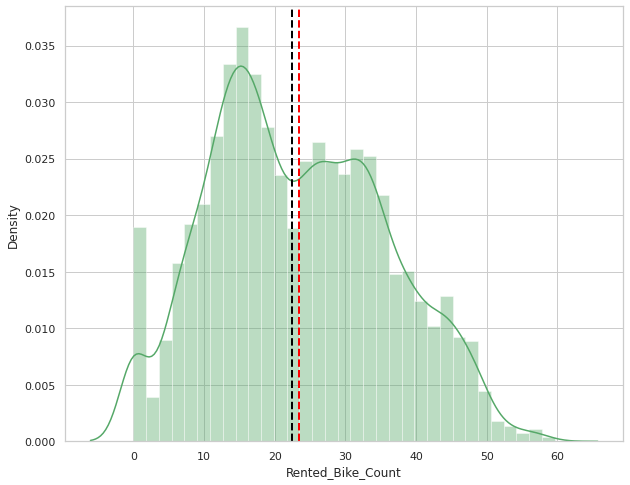

In [42]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="g")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

***Since we have generic rule of applying Square root for the skewed variable in order to make it normal. After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

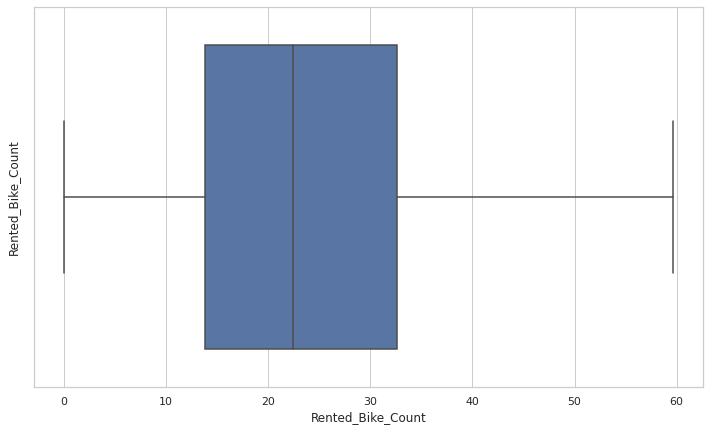

In [43]:
#After applying sqrt on Rented Bike Count, let'scheck whether we still have outliers 
plt.figure(figsize=(12,7))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

In [44]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,0.149738,-0.167629,-0.121695
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.072301,0.008500,1.000000


**NO OUTLIERS :D :D**

###***Creating the dummy variables:***
*A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.*

In [45]:
#Assign all categorical features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Function_Day', 'month', 'week_end_days'], dtype='object')

####***One hot encoding:***
* *It allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.*

In [46]:
#creating a copy of the dataframe first
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()       

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,week_end_days_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **MODEL IMPLEMENTATION:**
## ***1. Linear Regression***

###**Overview**
*Linear Regression is a machine learning algorithm based on supervised learning. It is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables(also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models. We will use this model to predict the required number of rental bikes required at each hour.*

*Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.*

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where$$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$

###**Method**
* *From Seoul Bike Data df, we create a new Dataframe X containing all the columns except Rented Bike Count(because it is our dependent variable) and a Series y containing only the Rented Bike Count column. These will be our design matrix and target respectively for our linear regression model.*

* *We perform a test-train split to create X_train, X_test, y_train and y_test.*

* *The rental bike data is therefore partitioned into two namely, training set for building the regression and testing set for assessing the model performance. Usually larger part of data is needed to teach the models and so the 75% of the final data is utilized for model training and the remaining 25% of the data is used for testing purpose, these are the same proportions used in the research article.*

In [47]:
# design matrix and target
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

**COMMENT:**
* *We create and train a linear regression model and using trained model, we compute y_pred, the prediction on the test data X_test.*

In [48]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the train data
regr.fit(X_train, y_train)

# Use the model to predict the test data
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)


**COMMENT:**
* *We compute and print the values of the following parameters:*
Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i|

Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−y^i)2

Root Mean Squared Error (RMSE) bold text is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.
* ***Root Mean Squared Error (RMSE),***
* ***Mean Absolute Error (MAE),***
* ***Rsquared (R2).***

In [49]:
# Root Mean Squared Error
RMSE = np.sqrt(np.mean(y_train-y_pred_train)**2)
print('The Root Mean Squared Error is',RMSE)

# Mean Absolute Error
MAE = np.mean(np.abs(y_train-y_pred_train))
print('The Mean Absolute Error is',MAE)

#Rsquared
R2 = r2_score(y_train, y_pred_train)
print('The Rsquared value is',R2)



The Root Mean Squared Error is 4.337601425141335e-09
The Mean Absolute Error is 4.45182056824804
The Rsquared value is 0.7765198093956164


***It can be inferred that our r2 score value is 0.77 that means our model is  able to capture most of the data variance. We will save it in a dataframe for later comparisons.***

In [50]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((R2),3),
       }
training_df=pd.DataFrame(dict1,index=[1])

In [51]:
# Root Mean Squared Error
RMSE = np.sqrt(np.mean(y_test-y_pred_test)**2)
print('The Root Mean Squared Error is',RMSE)

# Mean Absolute Error
MAE = np.mean(np.abs(y_test-y_pred_test))
print('The Mean Absolute Error is',MAE)

#Rsquared
R2 = r2_score(y_test, y_pred_test)
print('The Rsquared value is',R2)



The Root Mean Squared Error is 0.15225565810641986
The Mean Absolute Error is 4.4261678298327105
The Rsquared value is 0.7762412597172526


***The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).***

In [52]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((R2),3),
       }
training_df=pd.DataFrame(dict2,index=[1])

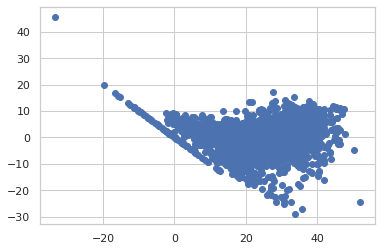

In [53]:
##Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

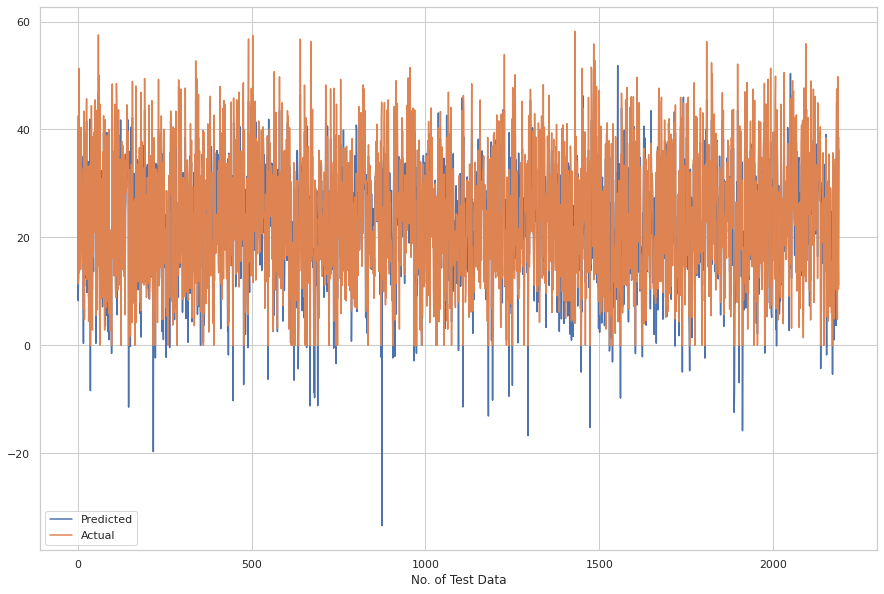

In [54]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **Residuals:**
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

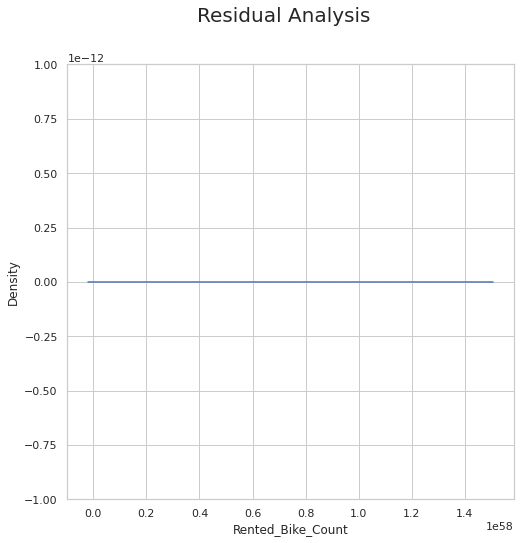

In [62]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_test)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

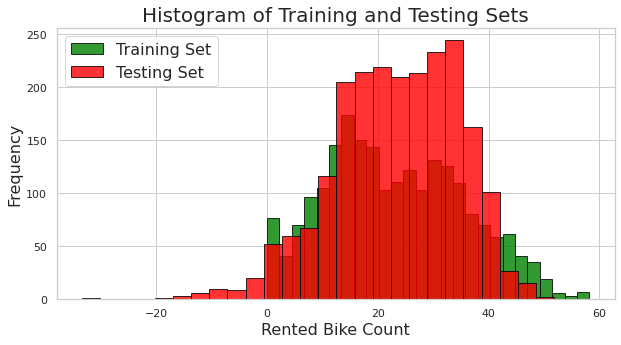

In [55]:
#Histograms of y_test and of y_pred
fig = plt.figure(figsize=(10,5))

plt.hist(y_test, bins=26, edgecolor='black',alpha= 0.8, color='green', label='Training Set')
plt.hist(y_pred_test, bins=26, edgecolor='black', alpha= 0.8, color='red', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=20)
plt.xlabel('Rented Bike Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=16)

plt.show()

## ***2. Decision Tree Regression Model***

###**Overview**
*Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.*

###**Method**
*We create and train a Decision Tree Regressor with max_depth=6. Then, by using X_train, X_test, y_train and y_test we computed for the Linear Regression test, we predict the test data y_pred_tree by using the Deciosion Tree Regressor.*

*We also compute the residual for this model, which we call resid_tree.*

In [56]:
# Create Decision Tree Regressor object
regr_tree = DecisionTreeRegressor(max_depth=6)

# Train the model using the train data
regr_tree.fit(X_train, y_train)

# Use the model to predict the test data
y_pred_tree = regr_tree.predict(X_test)

# Form residual
resid_tree = y_test - y_pred_tree

**COMMENT:**
* *We compute and print the values of the following parameters for Decision Tree Regression Model as well:*

* ***Root Mean Squared Error (RMSE),***
* ***Mean Absolute Error (MAE),***
* ***Rsquared (R2).***

In [57]:
# Root Mean Squared Error
RMSE_tree = np.sqrt(np.mean(resid_tree**2))
print('The Root Mean Squared Error is',RMSE_tree)
print()

# Mean Absolute Error
MAE_tree = np.mean(np.abs(resid_tree))
print('The Mean Absolute Error is',MAE_tree)
print()

#Rsquared
R2_tree = r2_score(y_test, y_pred_tree)
print('The Rsquared value is',R2_tree)

The Root Mean Squared Error is 7.021078974910296

The Mean Absolute Error is 5.280936946973965

The Rsquared value is 0.6859823330185155


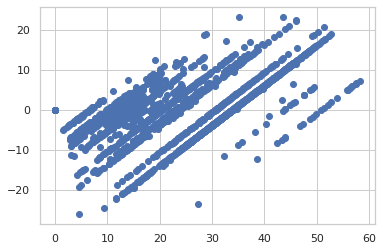

In [58]:
### Heteroscadacity
plt.scatter((y_test),(y_test)-(y_pred_tree))

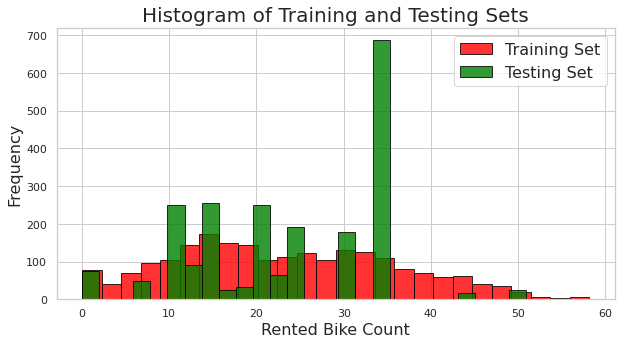

In [59]:
#Histograms of y_test and of y_pred_tree
fig = plt.figure(figsize=(10,5))
plt.hist(y_test, bins=26, edgecolor='black',alpha= 0.8, color='red', label='Training Set')
plt.hist(y_pred_tree, bins=26, edgecolor='black', alpha= 0.8, color='green', label='Testing Set')

plt.title('Histogram of Training and Testing Sets', fontsize=20)
plt.xlabel('Rented Bike Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=16)

plt.show()